In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import pylab as pl
%matplotlib inline

In [2]:
lcap = 6e-9
num  = 1000
R0   = (1 + abs(np.random.randn(num))) * 1e-9
cinf = 55.33
cs   = 5.53e-2
Vm   = 3.29e-5
D    = 3.01e-18
k    = 7.97e-10
N0   = 8.04e21
beta = 4 * np.pi * N0 * R0**3 / (3 * Vm)
Da   = D/(k * R0)

In [3]:
delta_C = cinf - cs * np.exp(lcap/R0)
minarg  = np.argmin(R0**2 / delta_C)
t0      = (R0**2 / (Vm * D * delta_C))[minarg]

In [100]:
def dR_dt(t, R):
    
    ind     = R * R0 < 1e-10
    nind    = np.invert(ind)
    N       = np.where(nind)[0].size
    csolute = cinf - np.sum(beta[nind] * R[nind]**3) / N

    dRdt       = np.zeros(num)
    dRdt[nind] =   ((R0[minarg] / R0[nind])**2 / delta_C[minarg]) \
                 * (cinf - np.sum(beta[nind] * R[nind]**3) / num - cs * np.exp(lcap / (R0[nind] * R[nind])))/(Da[nind] + R[nind])
    
    return dRdt

In [101]:
t_final = 1000

In [102]:
Rinit = np.ones(num)
sol1  = solve_ivp(dR_dt, (0, t_final), Rinit)

In [103]:
# sol1

In [104]:
# for time_index, t0 in enumerate(t):
#     print(time_index)
#     pl.hist(R0 * sol1[0][time_index] / 1e-9, 50)
#     pl.xlim([0.8, 7])
#     pl.ylim([0, 4000])    
#     pl.xlabel(r'Size(in nm)')
#     pl.ylabel(r'$N$')
#     pl.title('Time = %3.2f'%(t[time_index]) + r'$\tau$')
#     pl.savefig('images/%04d'%(time_index) + '.png', dpi = 50)
#     pl.clf()

(array([ 1.,  1.,  4.,  6.,  8.,  2.,  3., 12., 21., 21., 16., 23., 25.,
        27., 39., 49., 52., 70., 55., 59., 53., 60., 53., 36., 42., 51.,
        41., 29., 32., 18., 12., 29., 13., 13.,  7.,  5.,  3.,  3.,  1.,
         1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.34259949, 1.45394249, 1.5652855 , 1.6766285 , 1.7879715 ,
        1.8993145 , 2.01065751, 2.12200051, 2.23334351, 2.34468652,
        2.45602952, 2.56737252, 2.67871552, 2.79005853, 2.90140153,
        3.01274453, 3.12408753, 3.23543054, 3.34677354, 3.45811654,
        3.56945954, 3.68080255, 3.79214555, 3.90348855, 4.01483155,
        4.12617456, 4.23751756, 4.34886056, 4.46020356, 4.57154657,
        4.68288957, 4.79423257, 4.90557558, 5.01691858, 5.12826158,
        5.23960458, 5.35094759, 5.46229059, 5.57363359, 5.68497659,
        5.7963196 , 5.9076626 , 6.0190056 , 6.1303486 , 6.24169161,
        6.35303461, 6.46437761, 6.57572061, 6.68706362, 6.79840662,
        6.90974962]),
 <a list of 50

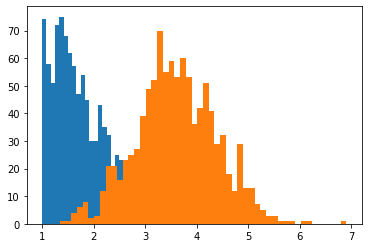

In [105]:
pl.hist(R0 * sol1['y'][:, 0] / 1e-9, 50)
pl.hist(R0 * sol1['y'][:, -1] / 1e-9, 50)

In [66]:
surf_energy = np.zeros(sol1['t'].size)
for time_index, t0 in enumerate(t):
    surf_energy[time_index] = ((R0 * sol1[0][time_index] / 1e-9)**2).mean()

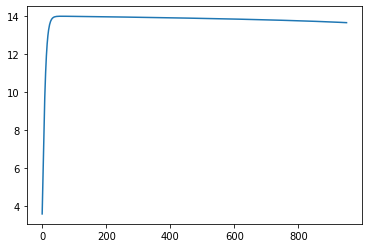

In [68]:
pl.plot(t, surf_energy)

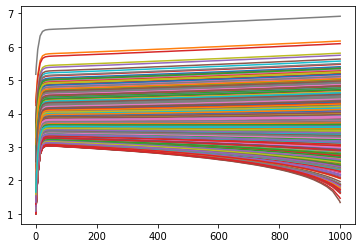

In [110]:
pl.plot(sol1['t'], (R0.reshape(1000, 1) * sol1['y'] / 1e-9).T)

In [108]:
sol1['t']

array([0.00000000e+00, 1.47659372e-01, 1.62425309e+00, 6.46324466e+00,
       1.42249539e+01, 2.22302671e+01, 3.15097595e+01, 4.30141135e+01,
       5.80075912e+01, 7.84506729e+01, 1.04955204e+02, 1.23191688e+02,
       1.42879997e+02, 1.65261557e+02, 1.85881529e+02, 2.06950922e+02,
       2.28020316e+02, 2.49089709e+02, 2.70159102e+02, 2.88747587e+02,
       3.07774228e+02, 3.29217915e+02, 3.52370970e+02, 3.71159024e+02,
       3.90718229e+02, 4.12481363e+02, 4.35329467e+02, 4.54027229e+02,
       4.73456151e+02, 4.95254319e+02, 5.18349281e+02, 5.37030325e+02,
       5.56487242e+02, 5.78390065e+02, 6.01610202e+02, 6.20268825e+02,
       6.39727281e+02, 6.61723782e+02, 6.85100061e+02, 7.03752287e+02,
       7.23230719e+02, 7.45329098e+02, 7.68857163e+02, 7.87518885e+02,
       8.07029347e+02, 8.29234614e+02, 8.52917810e+02, 8.71612074e+02,
       8.91173824e+02, 9.13493745e+02, 9.37332980e+02, 9.56093231e+02,
       9.75733721e+02, 9.98179555e+02, 1.00000000e+03])